In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',10,'display.width',1000)

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Calculate the mean of numerical columns only
train.groupby('Survived').mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
# Select only numerical columns before calculating correlations
numerical_train = train.select_dtypes(include=['number'])
correlation_matrix = numerical_train.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [ ]:
male_l=len(train[train['Sex']=='male'])
print("no of males:",male_l)

no of males: 577


In [ ]:
female_l=len(train[train['Sex']=='female'])
print("no of females:",female_l)

no of females: 314


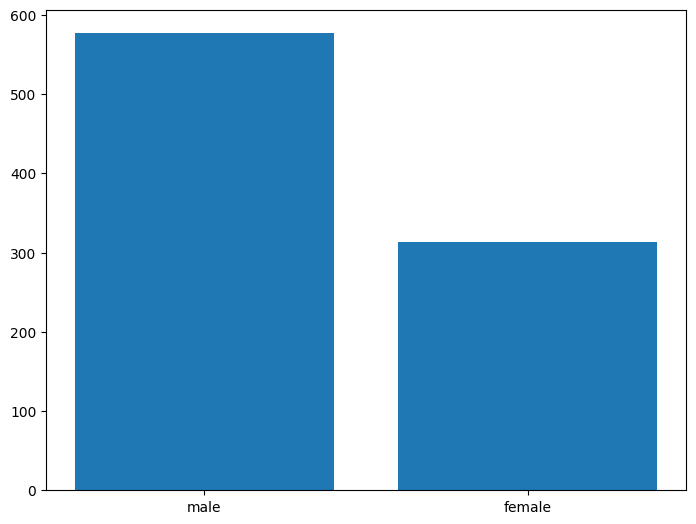

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['male','female']
count=[male_l,female_l]
ax.bar(gender,count)
plt.show()

In [ ]:
alive=len(train[train['Survived']==1])
print("no of people survived:",alive)
dead=len(train[train['Survived']==0])
print("no of people dead:",dead)

no of people survived: 342
no of people dead: 549


In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


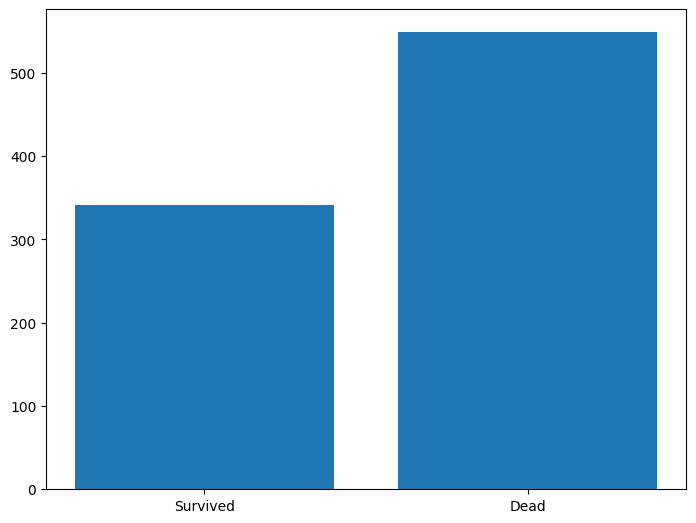

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
status=['Survived','Dead']
count=[alive,dead]
ax.bar(status,count)
plt.show()

Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people dead')

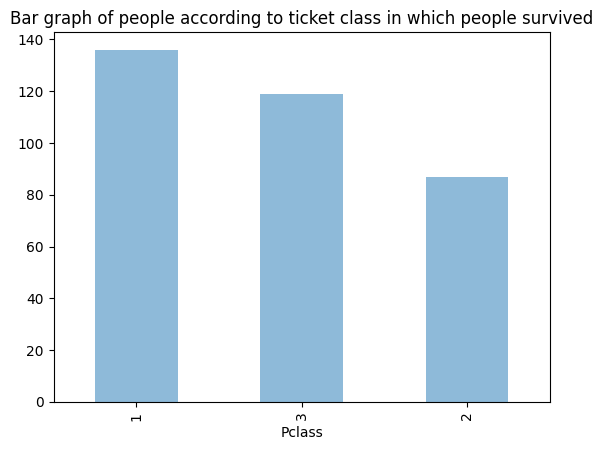

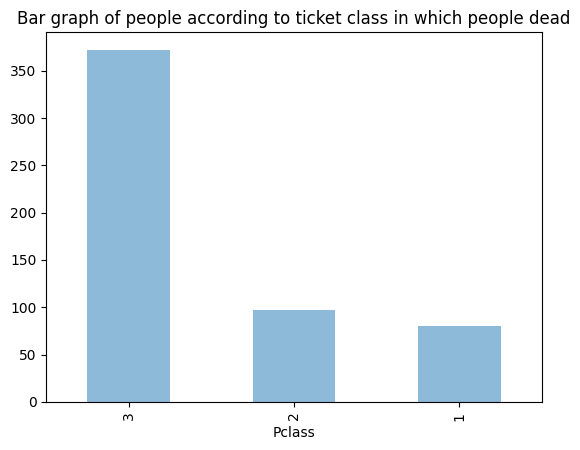

In [ ]:
plt.figure(1)
train[train['Survived']==1]['Pclass'].value_counts().plot(kind='bar',alpha=0.5)  # Use boolean indexing to filter the DataFrame
plt.title('Bar graph of people according to ticket class in which people survived')

plt.figure(2)
train[train['Survived']==0]['Pclass'].value_counts().plot(kind='bar',alpha=0.5) # Use boolean indexing to filter the DataFrame
plt.title('Bar graph of people according to ticket class in which people dead')

Text(0.5, 1.0, 'Histogram of people according to age in which people dead')

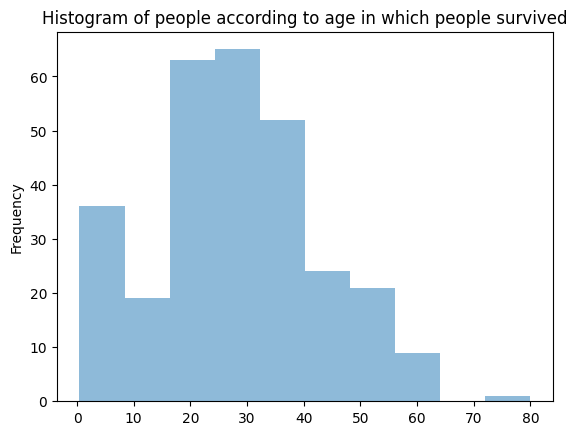

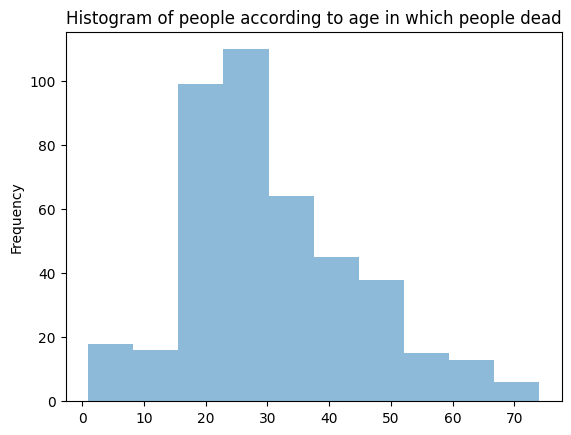

In [ ]:
plt.figure(1)
age=train.loc[train['Survived']==1,'Age'].plot(kind='hist',alpha=0.5)
plt.title('Histogram of people according to age in which people survived')

plt.figure(2)
age=train.loc[train['Survived']==0,'Age'].plot(kind='hist',alpha=0.5)
plt.title('Histogram of people according to age in which people dead')


In [ ]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Age',ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [ ]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


([<matplotlib.patches.Wedge at 0x799ef59909d0>,
 [Text(0.39257483889210154, 1.0275626481479563, 'Survived'),
  Text(-0.3925747426847421, -1.0275626849034607, 'Dead')],
 [Text(0.21413173030478264, 0.5604887171716125, '38.38%'),
  Text(-0.2141316778280411, -0.5604887372200694, '61.62%')])

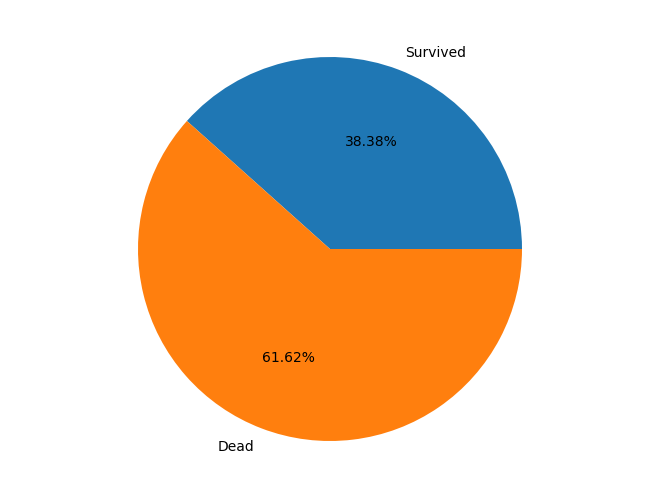

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
status=['Survived','Dead']
count=[alive,dead]
ax.pie(count,labels=status,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x799ef7fea7d0>,
 [Text(0.911772230064993, 0.6153628201982223, 'C=Cherbourg'),
  Text(0.12219517070335402, 1.0931918131127667, 'Q=Queenstown'),
  Text(-0.712839742990267, -0.8377705537995295, 'S=Southampton')],
 [Text(0.49733030730817795, 0.3356524473808485, '18.90%'),
  Text(0.06665191129273855, 0.5962864435160545, '8.66%'),
  Text(-0.3888216779946911, -0.4569657566179251, '72.44%')])

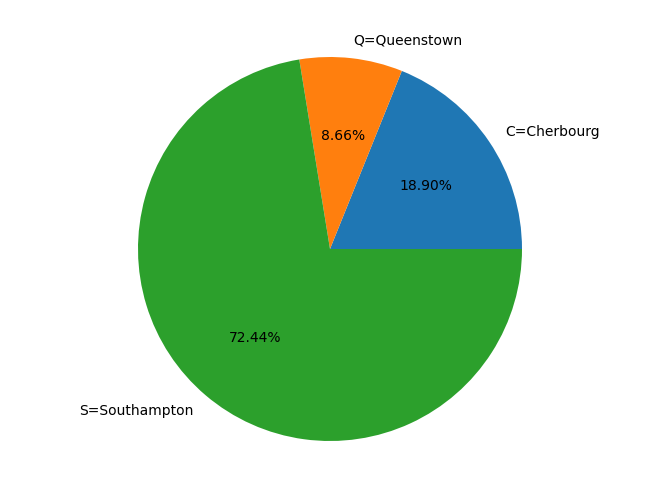

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['C=Cherbourg','Q=Queenstown','S=Southampton']
count=[len(train[train['Embarked']=='C']),len(train[train['Embarked']=='Q']),len(train[train['Embarked']=='S'])]
ax.pie(count,labels=l,autopct='%1.2f%%')

In [ ]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
train=train.drop(['Name','Ticket','Cabin'],axis=1)
test=test.drop(['Name','Ticket','Cabin'],axis=1)

In [ ]:
from re import X
col=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=train[col]
y=train['Survived']

In [ ]:
X['Age']  = X['Age'].fillna(X['Age'].median())
X['Fare']  = X['Fare'].fillna(X['Fare'].mean())
X['Embarked']  = X['Embarked'].fillna(X['Embarked'].mode()[0])

In [ ]:
X['Age'].isnull().sum()
X['Fare'].isnull().sum()
X['Embarked'].isnull().sum()

0

In [ ]:
d=['male','female']
X['Sex']=X['Sex'].apply(lambda x:d.index(x))
X['Sex'].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [ ]:
e=['C','Q','S']
X['Embarked']=X['Embarked'].apply(lambda x:e.index(x))
X['Embarked'].head()


,Embarked
0,2
1,0
2,2
3,2
4,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.7574626865671642


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification report\n",classification_report(y_test,y_pred))
print("confusion matrix\n",confusion_matrix(y_test,y_pred))

classification report
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       156
           1       0.74      0.65      0.69       112

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268

confusion matrix
 [[130  26]
 [ 39  73]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.6567164179104478


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification report\n",classification_report(y_test,y_pred))
print("confusion matrix\n",confusion_matrix(y_test,y_pred))

classification report
               precision    recall  f1-score   support

           0       0.67      0.81      0.73       156
           1       0.62      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.65      0.66      0.64       268

confusion matrix
 [[126  30]
 [ 62  50]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.7686567164179104


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification report\n",classification_report(y_test,y_pred))
print("confusion matrix\n",confusion_matrix(y_test,y_pred))

classification report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

confusion matrix
 [[129  27]
 [ 35  77]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.7388059701492538


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("classification report\n",classification_report(y_test,y_pred))
print("confusion matrix\n",confusion_matrix(y_test,y_pred))

classification report
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       156
           1       0.72      0.61      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.72       268
weighted avg       0.74      0.74      0.73       268

confusion matrix
 [[130  26]
 [ 44  68]]


In [ ]:
results=pd.DataFrame({
    'Models':['Logistic Regression','KNN','Naive Bayes','Decision Tree'],
    'Score':[0.75,0.65,0.76,0.73]
})
result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Models
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.73,Decision Tree
0.65,KNN
